## Modelización

Con este código: Se entrena un modelo lineal de aprendizaje automático (machine learning) utilizando las variables seleccionadas en el código anterior (Selección).

<b>Es importante establecer la semilla</b> para poder reproducir el ajuste (entrenamiento) del modelo.

In [20]:
# Manejo de datos
import pandas as pd
import numpy as np

# Representación gráfica
import matplotlib.pyplot as plt

# Modelización
from sklearn.linear_model import Lasso #Ajuste
from sklearn.metrics import mean_squared_error, r2_score #Evaluación
from math import sqrt #Evaluación

#Test de normalidad
import scipy as scipy

# Visualización de todas las columnas del banco de datos
pd.pandas.set_option('display.max_columns', None)

In [2]:
#Ingesta de datos: se cargan los datos resultantes del "Procesado"
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

#Visualización
#X_train.head()

In [3]:
# Variable endógnea (objetivo, target)

y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

In [4]:
# Variables exógenas (predictoras) seleccionadas: se cargan del archivo resultante del código de "Selección"

features = pd.read_csv('selected_features.csv')
features = features['0'].to_list() 
# Añadims una...
features = features + ['LotFrontage'] 

# Visualización
#print(features)
print(f"Variables: {features}")
X_test.head()

Variables: ['MSZoning', 'LotArea', 'BedroomAbvGr', 'LotFrontage']


,MSZoning,LotArea,BedroomAbvGr,LotFrontage
0,1.0,0.393847,0.666667,0.393693
1,1.0,0.518055,0.500000,0.564810
2,1.0,0.467060,0.166667,0.465802
3,0.0,0.322136,0.333333,0.465802
4,1.0,0.468075,0.333333,0.465802


In [ ]:
# Se descarta el resto de variables
X_train = X_train[features]
X_test = X_test[features]

### Regresión lineal de Lasso

<b>¡No olvidar, establecer la semilla!</b>

In [5]:
# Modelo, asjutando el valor alpha y la semilla:
lin_model = Lasso(alpha=0.005, random_state=0)

# Entrenamiento del modelo:
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

### Evaluación de la capacidad predictiva del modelo

In [11]:
# Predicciones con el set de entrenamiento
pred = lin_model.predict(X_train)

# Medidas de precisión:

#Mean Sqared Standard Error
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
# Mean Standard Error
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))


# Medida de bondad de ajuste

#R-Squared
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

train mse: 107059985
train rmse: 10346
train r2: 0.6178712765364902



In [13]:
# Predicciones con el set de prueba
pred = lin_model.predict(X_test)

# Medidas de precisión:

#Mean Sqared Standard Error
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
# Mean Standard Error
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))

# Medida de bondad de ajuste

#R-Squared
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Precio medio: ', int(np.exp(y_train).median()))

test mse: 68174255
test rmse: 8256
test r2: 0.667605006163563

Precio medio:  179074


Text(0.5, 1.0, 'Evaluación de las predicciones')

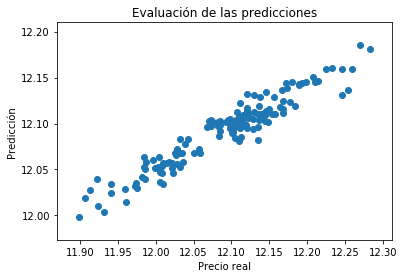

In [15]:
# Evaluación gráfica
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('Precio real')
plt.ylabel('Predicción')
plt.title('Evaluación de las predicciones')

NormaltestResult(statistic=0.11934793658012041, pvalue=0.9420716287441536)

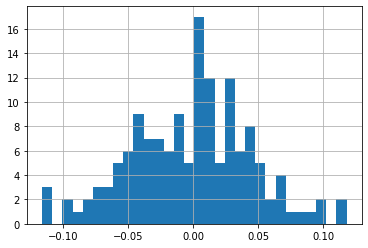

In [28]:
# Distribución de los errores

errors = y_test - lin_model.predict(X_test)
errors.hist(bins=30)

# Test de normalidad de los errores
p_bart = scipy.stats.normaltest(errors)
p_bart

### Capacidad predictiva de las variables exógenas

Text(0.5, 1.0, 'Capacidad explicativa')

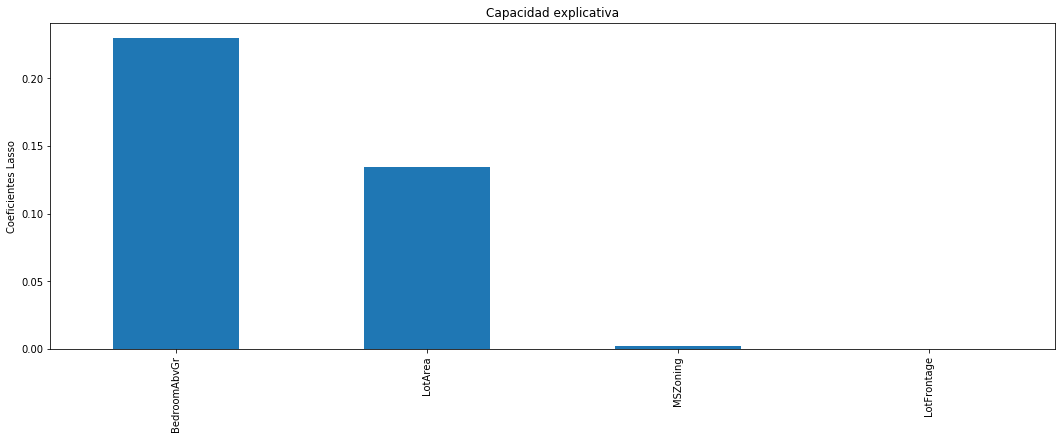

In [30]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Coeficientes Lasso')
plt.title('Capacidad explicativa')